In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1,)

In [3]:
X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = mnist.target[:60000]
y_test = mnist.target[60000:]

In [4]:
print(X_train.shape) # (60000, 784)
print(X_test.shape) # (10000, 784)
print(X_train[0].dtype) # float64
print(X_train[0])

(60000, 784)
(10000, 784)
float64
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 19

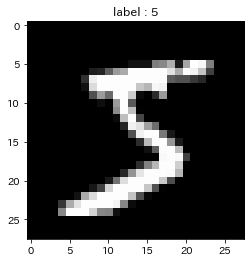

In [5]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

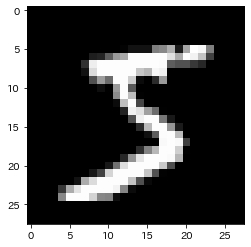

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_tr.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [10]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [30]:
get_mini_batch = GetMiniBatch(X_tr, y_tr, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1

In [12]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, epoch=5, verbose = True):
        self.epoch = epoch
        self.verbose = verbose
        self.layers = {}
        self.layers['Affine1'] = Affine(784, 400, 0.01, 0.01)
        self.layers['Tanh1'] = Tanh()
        self.layers['Affine2'] = Affine(400, 200, 0.01, 0.01)
        self.layers['Tanh2'] = Tanh()
        self.layers['Affine3'] = Affine(200, 10, 0.01, 0.01)
        self.last_layer = SoftmaxWithLoss()
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.loss_list = []
        self.loss_epoch_list = []
        self.loss_val_epoch_list = []
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=20, seed=i)
            for X_batch, y_batch in get_mini_batch:
                for layer in self.layers.values():
                    X_batch = layer.forward(X_batch)
                softmax = self.last_layer.forward(X_batch)
                loss, dA = self.last_layer.backward(y_batch)
                self.loss_list.append(loss)
                layers = list(self.layers.values())
                layers.reverse()
                for layer in layers:
                    dA = layer.backward(dA)
            self.loss_epoch_list.append(loss)      
            if self.verbose:
                print(loss)
                
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        for layer in self.layers.values():
            X = layer.forward(X)
        X = self.last_layer.forward(X)
        y_pred = np.argmax(X, axis=1)

        return y_pred
    
    def _init_weight(self, rows, columns):
        self.weight = self.sigma*np.random.randn(rows, columns)
        
        return self.weight

# 【問題1】重みの初期値を決めるコードの作成

In [13]:
class Affine:
    def __init__(self, input_size, output_size, sigma, lr):
        self.W = sigma*np.random.randn(input_size, output_size)
        self.B = sigma*np.random.randn(output_size)
        self.lr = lr
    
    def forward(self, X):
        self.X = X
        self.A = np.dot(X, self.W) + self.B
        
        return self.A
    
    def backward(self, dA):
        self.dB = np.sum(dA, axis=0)
        self.dW = np.dot(self.X.T, dA)
        dZ = np.dot(dA, self.W.T)
        self.B -= self.lr*self.dB
        self.W -= self.lr*self.dW
        
        return dZ

# 【問題2】フォワードプロパゲーションの実装

In [14]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, A):
        self.A = A
        self.Z = 1/(1 + np.exp(-self.A))
        
        return self.Z
    
    def backward(self, dout):
        dA = dout*(1 - self.A)*self.A
        
        return dA

In [15]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self, A):
        self.A = A
        out = np.tanh(A)
        
        return out
    
    def backward(self, dout):
        dA = dout*(1 - (np.tanh(self.A))**2)
        
        return dA

In [16]:
class SoftmaxWithLoss:
    def __init__(self):
        pass
    
    def forward(self, A):
        A -= np.max(A, axis=-1, keepdims=True)
        self.softmax = np.exp(A)/np.sum(np.exp(A), axis=-1, keepdims=True)
        
        return self.softmax
    
    def backward(self, y):
        delta = 1e-7
        self.loss = -np.sum(y*np.log(self.softmax + delta))/y.shape[0]
        dA = self.softmax - y

        return self.loss, dA

# 【問題3】交差エントロピー誤差の実装

## 上記のSoftmaxWithLossクラス内に実装

# 【問題4】バックプロパゲーションの実装

## 上記のAffine、Sigmoid、Tanh、SoftmaxWithLossクラスに実装

# 【問題5】推定

```python
def predict(self, X):
    """
    ニューラルネットワーク分類器を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        推定結果
    """
    for layer in self.layers.values():
        X = layer.forward(X)
    X = self.last_layer.forward(X)
    y_pred = np.argmax(X, axis=1)

    return y_pred
```

# 【問題6】学習と推定

In [17]:
scr_snnc = ScratchSimpleNeuralNetrowkClassifier()

In [18]:
scr_snnc.fit(X_tr, y_tr)

0.22877470455060003
0.16740582908792745
0.2491709431730929
0.004374714908370526
0.0006301727306284452


In [19]:
y_pred = scr_snnc.predict(X_val)
y_pred

array([5, 4, 2, ..., 7, 7, 2], dtype=int64)

In [20]:
y_val_label = np.argmax(y_val, axis=1)
y_val_label

array([5, 4, 2, ..., 7, 7, 2], dtype=int64)

In [22]:
accuracy = accuracy_score(y_val_label, y_pred)
print('accuracy_score:{}'.format(accuracy))

accuracy_score:0.9701666666666666


# 【問題7】学習曲線のプロット

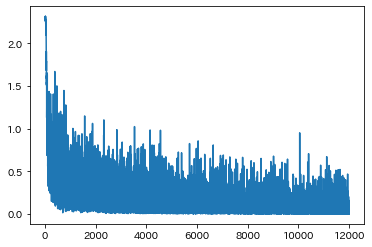

In [23]:
plt.plot(scr_snnc.loss_list)

# 【問題8】（アドバンス課題）誤分類の確認

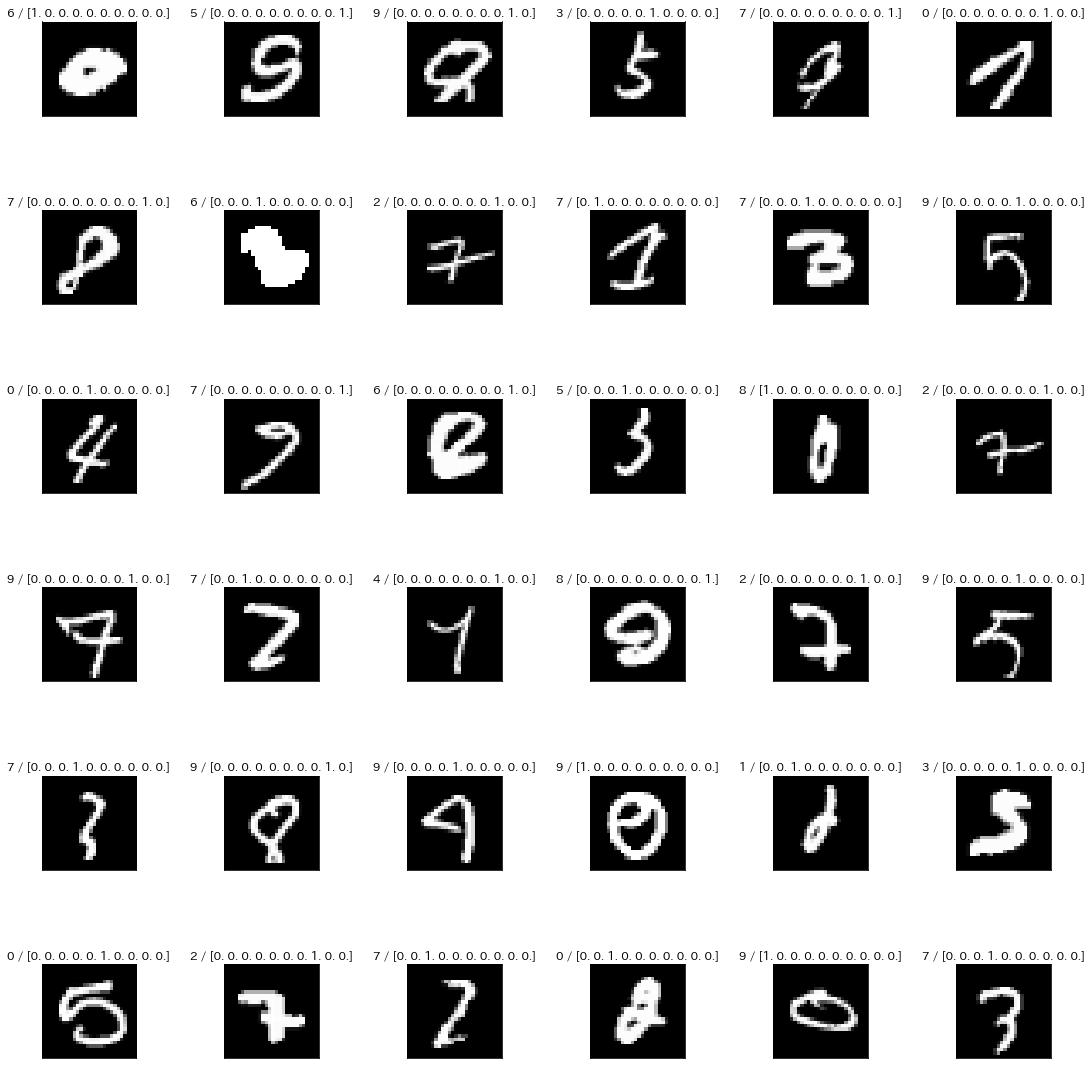

In [24]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = y_pred==y_val_label
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(18, 18))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')